In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import itertools

In [2]:
def lambda_swap(alpha, beta_):
    return 0.5*(1 + np.sqrt(1 - 16*alpha*(1-alpha)*beta_*(1-beta_)))

def P(lambda_, delta):
    return 2*(2*(1 - lambda_))**(1/delta - 1)/delta

def gen_lambda(delta):
    if delta <= 0:
        raise ValueError("delta must be positive")
    
    return float(f"{scipy.stats.beta.rvs(1, 1/delta, scale=0.5, loc=0.5):.2f}")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


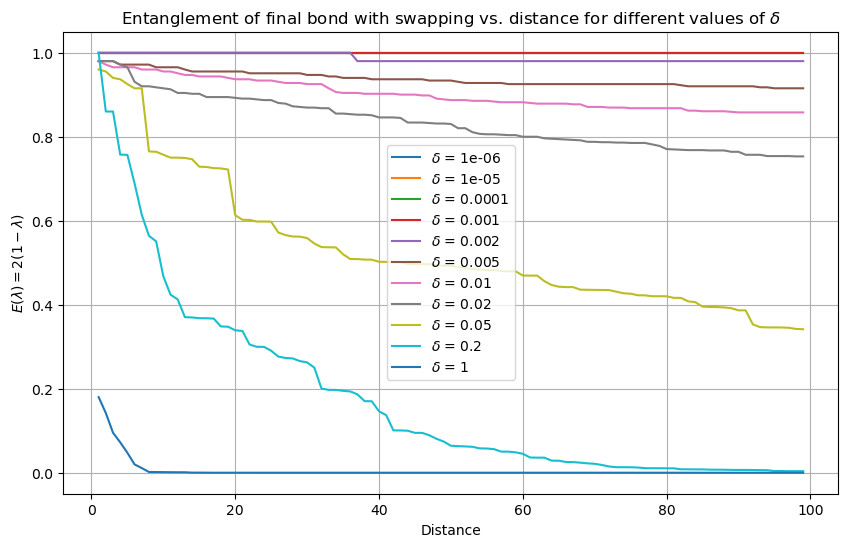

In [3]:
deltas = [1e-6, 1e-5, 1e-4, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.2, 1]
L = 100

plt.figure(figsize=(10, 6))

for delta in deltas:
    lambdas = []
    lambdas.append(gen_lambda(delta))

    for i in range(1, L-1):
        lambdas.append(lambda_swap(gen_lambda(delta), lambdas[-1]))
    
    plt.plot(np.arange(1, 100), 2*(1 - np.array(lambdas)), label=f'$\\delta$ = {delta}')


plt.xlabel('Distance')
plt.ylabel('$E(\lambda) = 2(1-\lambda)$')
plt.title('Entanglement of final bond with swapping vs. distance for different values of $\\delta$')
plt.grid(True)
plt.legend()

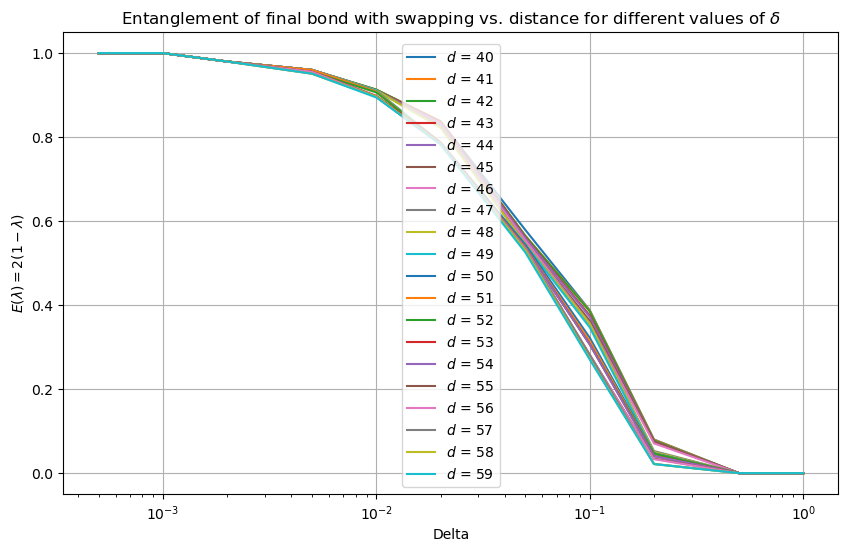

In [4]:
deltas = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
L = 100

plt.figure(figsize=(10, 6))

lambdas = {}

for delta in deltas:
    lambdas[delta] = []
    lambdas[delta].append(gen_lambda(delta))

    for i in range(1, L-1):
        lambdas[delta].append(lambda_swap(gen_lambda(delta), lambdas[delta][-1]))

for i in range(2*L//5, 3*L//5):
    plt.plot(deltas, [2*(1 - np.array(lambdas[delta][i])) for delta in deltas], label=f'$d$ = {i}')

plt.xlabel('Delta')
plt.ylabel('$E(\lambda) = 2(1-\lambda)$')
plt.title('Entanglement of final bond with swapping vs. distance for different values of $\\delta$')
plt.xscale('log')
plt.grid(True)
plt.legend()

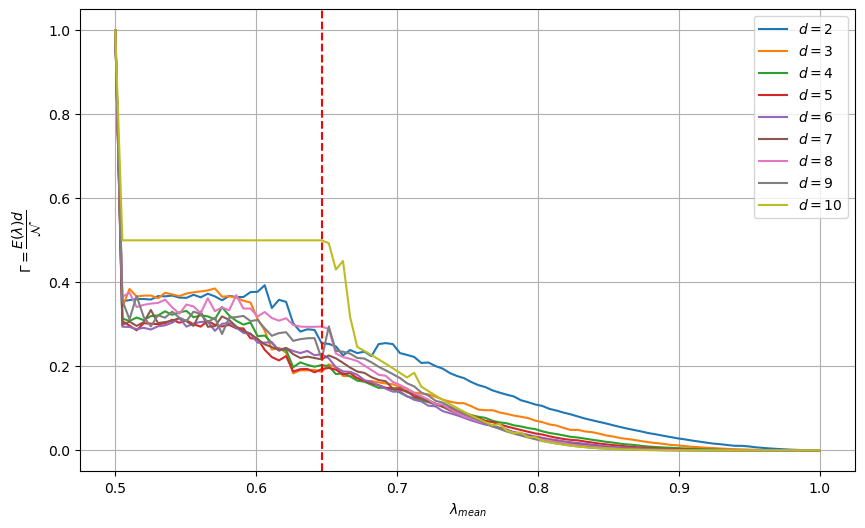

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range = 100
for (i, lambda_) in enumerate(lambdas[:range]):

    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

# ax.plot(lambdas[:range], [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:range]], label="mean")
for d in Ls[1:]:
    ax.plot(lambdas[:range], np.array([((ents[lambda_][d-1])*(d/Ns[lambda_][d-1])) for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')
    # ax.plot(lambdas[:range], np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
# for d in Ls[1:]:
#     ax2.plot(lambdas[:range], np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:range]])]), label='$d = {}$'.format(d))#, color='#1f77b4')

lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))


ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.grid(True)
ax.legend()
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])



lambda_c = lambdas[29]
ax.axvline(lambda_c, linestyle="dashed", color="red")

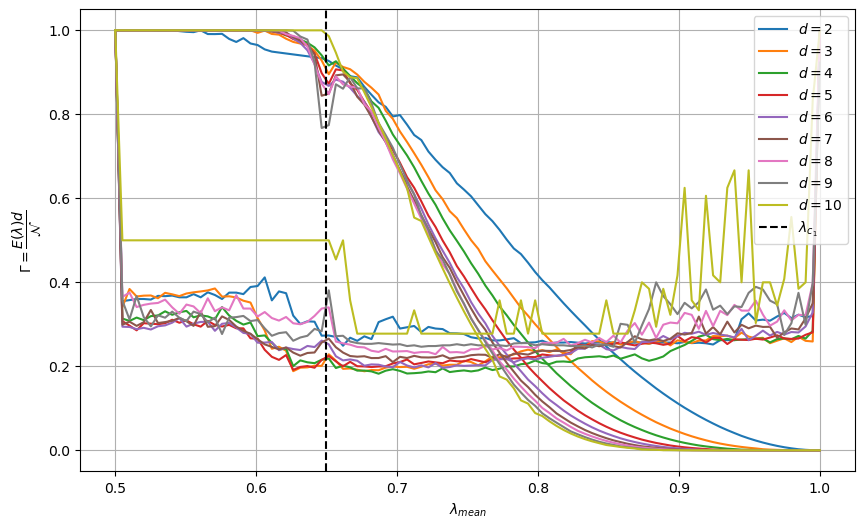

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 100
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls[1:]:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
ax.axvline(lambda_c, linestyle="dashed", color="black", label=r'$\lambda_{c_1}$')
ax.legend()


plt.show()

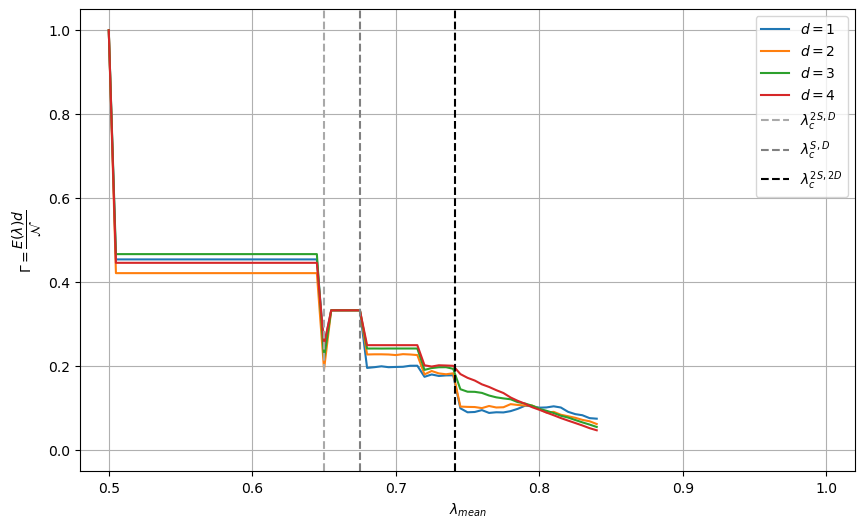

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/200)

ents = {}
Ns = {}
Ls = []

n = 6
range = 69
for (i, lambda_) in enumerate(lambdas[:range]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open("out_files/diagonal_square_lattice_6/mean/{}_{}.out".format(i+1, f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')), 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

# ax.plot(lambdas[:range], [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:range]], label="mean")
# ax.plot(lambdas[:range], np.concatenate((np.array([ents[lambdas[0]][Ls[0]-1]]), np.array([(ents[lambda_][Ls[0]-1])*(Ls[0]/Ns[lambda_][Ls[0]-1]) for lambda_ in lambdas[1:range]])), axis=None), label='$d = {}$'.format(Ls[0]))#, color='#1f77b4')

for d in Ls:
    ax.plot(lambdas[:range], np.array([((ents[lambda_][d-1])*((d+1)/(Ns[lambda_][d-1]+1))) for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')
    # ax.plot(lambdas[:range], np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
# for d in Ls[1:]:
#     ax2.plot(lambdas[:range], np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:range]])]), label='$d = {}$'.format(d))#, color='#1f77b4')


ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.set_xlim([0.48,1.02])
ax.set_ylim([-0.05,1.05])
ax.grid(True)
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [25]:
# Function to check if the product of lambda_i's for a subset is greater than 1/2
def check_subset_product(subset, lambda_values):
    product = np.prod([lambda_values[i] for i in subset])
    return product > 1/2

# Find the largest k such that for all subsets of size <= k, the product is > 1/2
def find_largest_k(lambda_values):
    for m in range(n, 0, -1):  # Start from n and decrease k
        all_products_valid = True
        # Generate all subsets of size <= k
        for subset_size in range(1, m+1):
            for subset in itertools.combinations(lambda_values.keys(), subset_size):
                if not check_subset_product(subset, lambda_values):
                    all_products_valid = False
                    break
            if not all_products_valid:
                break
        if all_products_valid:
            return m
    return 0

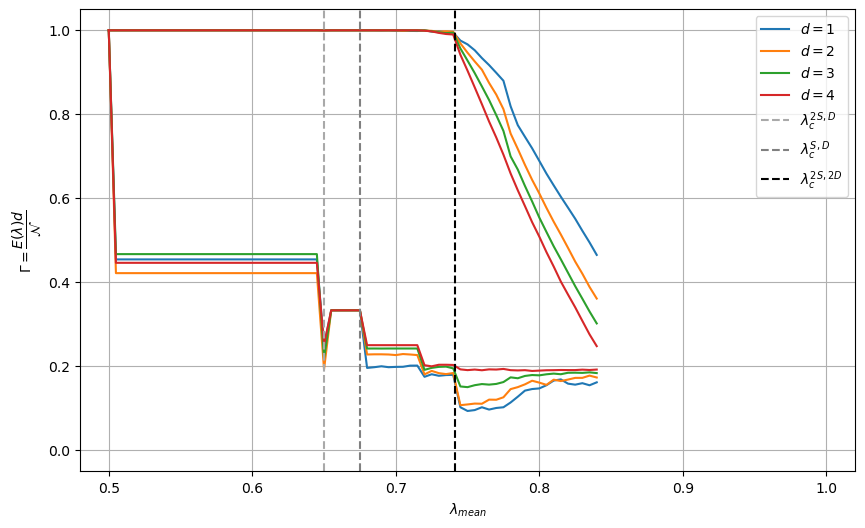

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/200)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 69
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open("out_files/diagonal_square_lattice_6/mean/{}_{}.out".format(i+1, f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')), 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([(d+1)/(Ns[lambda_][d-1]+1) for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
ax.set_xlim([0.48,1.02])
ax.set_ylim([-0.05,1.05])
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 100
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/diag_{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls[1:]:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()


plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import os

def generate_gaussian_values(N, x_min, x_max, x_mean, std_dev):
    if not (x_min <= x_mean <= x_max):
        raise ValueError("x_mean must be within the range [x_min, x_max]")
    
    # Step 1: Generate N random values from a Gaussian distribution
    values = np.random.normal(loc=x_mean, scale=std_dev, size=N)
    
    # Step 2: Clip values to ensure they remain within the range [x_min, x_max]
    clipped_values = np.clip(values, x_min, x_max)
    
    # Step 3: Calculate the current mean of the clipped values
    current_mean = np.mean(clipped_values)
    
    # Step 4: Adjust the clipped values to ensure the mean is exactly x_mean
    # We need to scale the values carefully without violating the bounds.
    # The idea is to shift the values in proportion to their current distance from x_mean.
    diff = x_mean - current_mean
    adjusted_values = clipped_values + diff
    
    # Ensure after adjustment that values don't exceed bounds
    adjusted_values = np.clip(adjusted_values, x_min, x_max)
    
    # Step 5: Final check and adjustment if the mean is still not x_mean
    final_mean = np.mean(adjusted_values)
    max_iters = 10000
    cnt = 0
    while abs(final_mean - x_mean) > 1e-16 and cnt <= max_iters:  # Tolerance for floating point errors
        # Scale the difference proportionally to the range
        diff = x_mean - final_mean
        adjusted_values += diff
        
        # Clip again to avoid out of range values
        adjusted_values = np.clip(adjusted_values, x_min, x_max)
        
        # Recompute the mean
        final_mean = np.mean(adjusted_values)
        cnt += 1
    
    return adjusted_values

# Example usage:
N = 36
x_min = 0.5
x_max = 1
x_mean = 0.505

values1 = generate_gaussian_values(N, x_min, x_max, x_mean, 0.01)
print("Generated values:", values1)
print("Mean of values:", np.mean(values1))

values2 = generate_gaussian_values(N, x_min, x_max, x_mean, 0.07)
print("Generated values:", values2)
print("Mean of values:", np.mean(values2))


# Plot for the second distribution
sns.kdeplot(values1, fill=True, color="skyblue", label="Estimated PDF")
plt.axvline(x_mean, color='red', linestyle='--', label=f'Mean: {x_mean}')
plt.title("PDF")
plt.xlim([x_min, x_max])
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Plot for the second distribution
sns.kdeplot(values2, fill=True, color="lightgreen", label="Estimated PDF")
plt.title("PDF")
plt.xlim([x_min, x_max])
plt.legend()

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()